## Problem 2: German Credit Dataset 

## Preprocessing

Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [57]:
import pandas as pd

def drop_least_contributing_columns(df, n): #Q1
    none_counts = (df != 'none').sum()
    # Sort the columns 
    least_contributing_columns = none_counts.sort_values().index[:n]
    # Drop the least contributing columns
    df = df.drop(columns=least_contributing_columns)

    return(df)

df = pd.read_csv("GermanCredit.csv")
df2 = drop_least_contributing_columns(df, 3)
print(df2)

    checking_status  duration                    credit_history  \
0              '<0'         6  'critical/other existing credit'   
1        '0<=X<200'        48                   'existing paid'   
2     'no checking'        12  'critical/other existing credit'   
3              '<0'        42                   'existing paid'   
4              '<0'        24              'delayed previously'   
..              ...       ...                               ...   
995   'no checking'        12                   'existing paid'   
996            '<0'        30                   'existing paid'   
997   'no checking'        12                   'existing paid'   
998            '<0'        45                   'existing paid'   
999      '0<=X<200'        45  'critical/other existing credit'   

                 purpose  credit_amount      savings_status  employment  \
0               radio/tv           1169  'no known savings'       '>=7'   
1               radio/tv           5951      

Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [58]:
def remove_apostrophes(df): #Q2
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.replace("'","") # Remove apostrophes
    
    return df
df3 = remove_apostrophes(df2)
print(df3)

    checking_status  duration                  credit_history  \
0                <0         6  critical/other existing credit   
1          0<=X<200        48                   existing paid   
2       no checking        12  critical/other existing credit   
3                <0        42                   existing paid   
4                <0        24              delayed previously   
..              ...       ...                             ...   
995     no checking        12                   existing paid   
996              <0        30                   existing paid   
997     no checking        12                   existing paid   
998              <0        45                   existing paid   
999        0<=X<200        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   


The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively

In [59]:
def update_checking_status(df): #Q3
    checking_status_col = "checking_status"
    # Map the values
    df[checking_status_col] = df[checking_status_col].replace({
        "<0": "Low",
        "0<=X<200": "Medium",
        ">=200": "High",
        "no checking": "No Checking"
    })
    return df
df4 = update_checking_status(df3)
print(df4)

    checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   


The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').


In [60]:
def update_savings_status(df): #Q4
    # mapping from old values to new values
    mapping = {
        'no known savings': 'No Savings',
        '<100': 'Low',
        '100<=X<500': 'Medium',
        '500<=X<1000': 'High',
        '>=1000': 'High'
    }
    df['savings_status'] = df['savings_status'].replace(mapping)
    return df
df5 = update_savings_status(df4)
print(df5)

    checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv           1169     No Savings         >=7   
1               radio/tv           5951            Low      1<=X<4   
2        

Change class column values from 'good' to '1' and 'bad' to '0'.


In [61]:
def update_class_col(df): #Q5
    class_col = "class"
    df["class"] = df["class"].replace({
    "bad":"0",
    "good":"1"})
    return df
df6 = update_class_col(df5)
print(df6)

    checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv           1169     No Savings         >=7   
1               radio/tv           5951            Low      1<=X<4   
2        

Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.


In [62]:
def update_employment_col(df): #Q6
    employment_col = "employment"
    df["employment"] = df["employment"].replace({
    "unemployed":"Unemployed",
    "<1":"Amateur",
    "1<=X<4":"Professional",
    "4<=X<7":"Experienced",
    ">=7":"Expert"})
    return df
df7 = update_employment_col(df6)
print(df7)

    checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status    employment  \
0               radio/tv           1169     No Savings        Expert   
1               radio/tv           5951            Low  Professional   
2  

## Analysis

Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad)

In [63]:
def count_foreign_worker(df):
    count = pd.crosstab(index=df["foreign_worker"], columns=df["class"])
    return count
print(count_foreign_worker(df7))

class             0    1
foreign_worker          
no                4   33
yes             296  667


Similarly, get the count of each category of employment for each category of saving_status.


In [64]:
def count_employment(df):
    employment_savings_count = pd.crosstab(index=df["employment"], columns=df["savings_status"])
    return employment_savings_count
print(count_employment(df7))

savings_status  High  Low  Medium  No Savings
employment                                   
Amateur           12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12


Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.


In [65]:
def average_credit_amount(df):
    filtered_df = df[(df["employment"] == "Experienced") & (df["personal_status"] == "male single")]
    experienced_sum = filtered_df["credit_amount"].sum()
    num_individuals = len(filtered_df)
    average_credit = experienced_sum / num_individuals
    return average_credit

print("Average credit amount of single males:", average_credit_amount(df7))

Average credit amount of single males: 4142.592592592592


Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.


In [66]:
def average_credit_duration(df):
    skilled_sum = df[df["job"] == "skilled"]["duration"].sum()
    unskilled_sum = df[df["job"] == "unskilled resident"]["duration"].sum()
    high_sum = df[df["job"] == "high qualif/self emp/mgmt"]["duration"].sum()
    unemp_sum = df[df["job"] == "unemp/unskilled non res"]["duration"].sum()

    skilled_count = len(df[df["job"] == "skilled"])
    unskilled_count = len(df[df["job"] == "unskilled resident"])
    high_count = len(df[df["job"] == "high qualif/self emp/mgmt"])
    unemp_count = len(df[df["job"] == "unemp/unskilled non res"])

    avg_skilled = skilled_sum / skilled_count
    avg_unskilled = unskilled_sum / unskilled_count
    avg_high = high_sum / high_count
    avg_unemp = unemp_sum / unemp_count

    print(f'Average credit duration for skilled is = {avg_skilled}')
    print(f'Average credit duration for unskilled resident is = {avg_unskilled}')
    print(f'Average credit duration for high qualif/self emp/mgmt is = {avg_high}')
    print(f'Average credit duration for unemp/unskilled non res is = {avg_unemp}')

average_credit_duration(df7)

Average credit duration for skilled is = 21.41111111111111
Average credit duration for unskilled resident is = 16.535
Average credit duration for high qualif/self emp/mgmt is = 25.16891891891892
Average credit duration for unemp/unskilled non res is = 17.363636363636363


For the purpose 'education', what is the most common checking_status and savings_status


In [67]:
def education_most_common_saving_checking(df):
    education = df[df["purpose"]=="education"]
    checking_count = pd.crosstab(education["checking_status"],columns = "count")
    savings_count = pd.crosstab(education["savings_status"],columns = "count")
    most_common_checking = checking_count.idxmax()[0]
    most_common_savings = savings_count.idxmax()[0]
    
    print(f'Most common checking status: {most_common_checking}')
    print(f'Most common savings status: {most_common_savings}')
education_most_common_saving_checking(df7)

Most common checking status: No Checking
Most common savings status: Low


## Visualization

Plot subplots of two bar charts: one for savings_status (x-axis) and the other for checking_status (x-axis). In each chart, the y-axis represents number of people. Moreover, for each category of saving_status (checking_status), we need you to display four bars, each corresponding to one of the "personal_status" categories. Each personal status category bar should be of a different color.


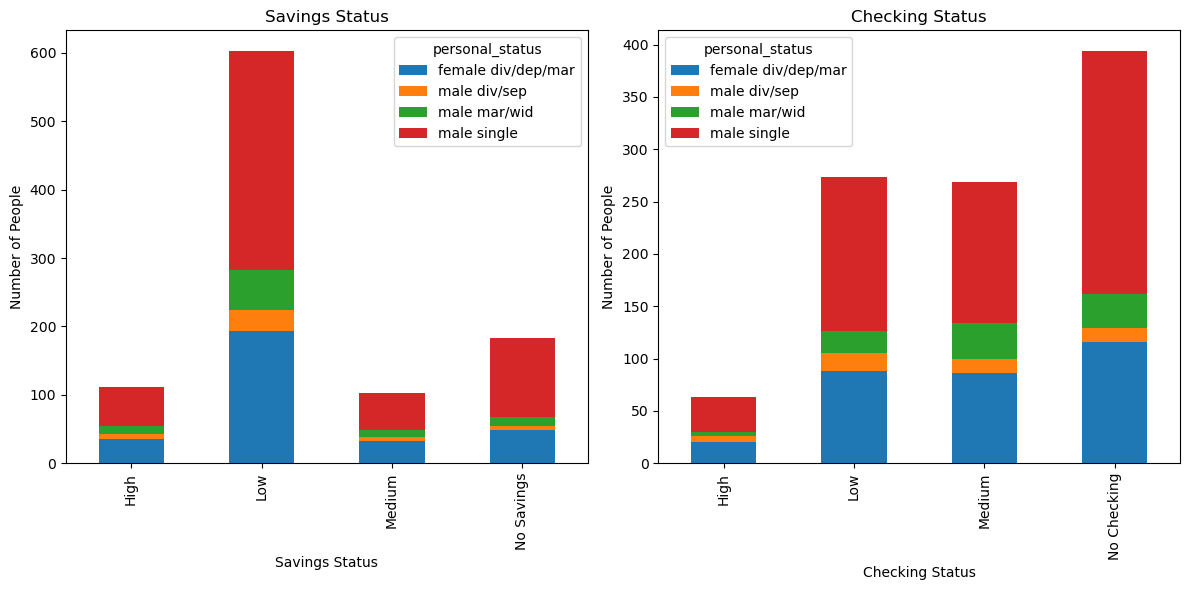

In [68]:
import matplotlib.pyplot as plt
def plot_subplots(df):
    savings_grouped = df.groupby(['savings_status', 'personal_status']).size().unstack()
    checking_grouped = df.groupby(['checking_status', 'personal_status']).size().unstack()
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    # Plot the first subplot (savings_status)
    savings_grouped.plot(kind='bar', ax=axs[0], stacked=True)
    axs[0].set_title('Savings Status')
    axs[0].set_xlabel('Savings Status')
    axs[0].set_ylabel('Number of People')

    # Plot the second subplot (checking_status)
    checking_grouped.plot(kind='bar', ax=axs[1], stacked=True)
    axs[1].set_title('Checking Status')
    axs[1].set_xlabel('Checking Status')
    axs[1].set_ylabel('Number of People')
    plt.tight_layout()
    plt.show()
    
plot_subplots(df7)

For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

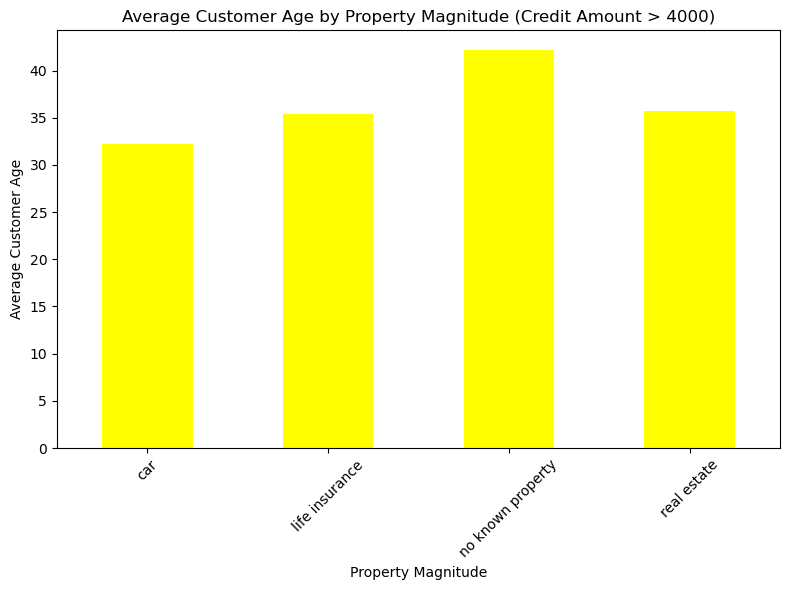

In [69]:
def plot_average_age_by_property_magnitude(df):
    filtered_df = df[df["credit_amount"] > 4000]
    avg_age_by_property = filtered_df.groupby("property_magnitude")["age"].mean()
    plt.figure(figsize=(8, 6))
    avg_age_by_property.plot(kind="bar", color="yellow")
    plt.title("Average Customer Age by Property Magnitude (Credit Amount > 4000)")
    plt.xlabel("Property Magnitude")
    plt.ylabel("Average Customer Age")
    # Show plot
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()
    
plot_average_age_by_property_magnitude(df7)

For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
Personal status
Credit history
Job

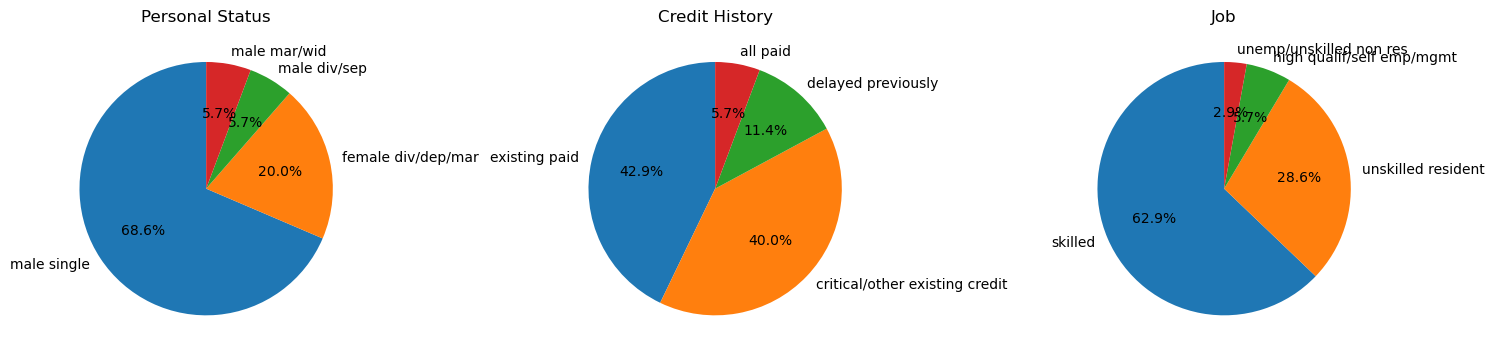

In [70]:
def plot_pie_charts(df):
    filtered_df = df[(df["savings_status"] == "High") & (df["age"] > 40)]
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot pie chart for personal status
    personal_status_counts = filtered_df["personal_status"].value_counts()
    axs[0].pie(personal_status_counts, labels=personal_status_counts.index, autopct='%1.1f%%', startangle=90)
    axs[0].set_title('Personal Status')
    
    # Plot pie chart for credit history
    credit_history_counts = filtered_df["credit_history"].value_counts()
    axs[1].pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=90)
    axs[1].set_title('Credit History')
    
    # Plot pie chart for job
    job_counts = filtered_df["job"].value_counts()
    axs[2].pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
    axs[2].set_title('Job')
    
    plt.tight_layout()
    plt.show()
    
plot_pie_charts(df7)